In [3]:
import pandas as pd

In [4]:
dota_hero_stats = pd.read_csv('dota_hero_stats.csv')

In [3]:
dota_hero_stats

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [7]:
dota_hero_stats['legs'].value_counts()

legs
2    95
0    11
4     7
6     3
8     1
Name: count, dtype: int64

In [8]:
dota_hero_stats.agg({'legs': 'value_counts'})

,legs
legs,
2,95
0,11
4,7
6,3
8,1


In [12]:
dota_hero_stats.groupby('legs').id.nunique()

legs
0    11
2    95
4     7
6     3
8     1
Name: id, dtype: int64

In [19]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).id.nunique()

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
Name: id, dtype: int64

In [28]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [23]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).agg({'id': 'count'}).sort_values('id', ascending=False)

id
attack_type primary_attr    
Ranged      int           40
Melee       str           35
            agi           19
Ranged      agi           18
            str            3
Melee       int            2

In [25]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).agg({'id':'count'}).idxmax()

id    (Ranged, int)
dtype: object

<Axes: >

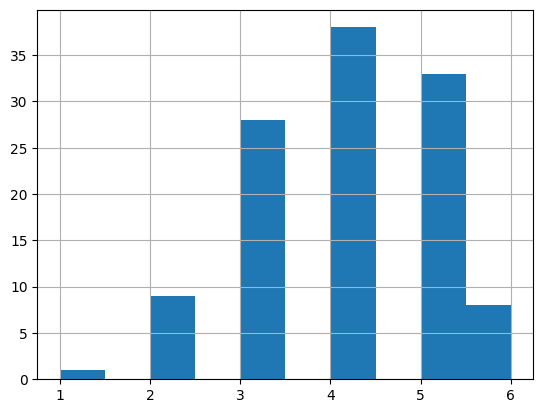

In [16]:
dota_hero_stats['roles'].apply(lambda x: x.count(',') + 1).hist()

In [11]:
dota_hero_stats.dtypes

Unnamed: 0         int64
attack_type       object
id                 int64
legs               int64
localized_name    object
name              object
primary_attr      object
roles             object
dtype: object

In [13]:
accountancy = pd.read_csv('accountancy.csv')

In [15]:
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [17]:
accountancy.groupby(['Type','Executor']).agg({'Salary': 'mean'}).unstack()

Salary            
Executor       Loopa        Pupa
Type                            
A          58.000000  160.833333
B         145.166667   77.000000
C         154.333333   74.500000
D         137.714286  146.500000
E         164.000000  131.200000
F         238.000000  136.250000